# Part 1

Instruction: In this EDA exercise, your objective is to explore the data, obtain useful statistics and identify the data required to allow an ML model to extract the information in a product’s nutritional table using product images as the input. This step will be focused on data analysis and does not involve any model development.

## Read the datafile (.csv)

Using pandas library we are able to read the .csv file and extract the info in an efficient way. We decided to read a certain number of rows (nrows = 10000) due to several reasons:
- Perform faster data exploration: allows for quicker exploration of the data structure, column types, and contents without the need to load the entire file. 
- Memory Efficiency: loading the entire file can overwhelm system memory (RAM)
- Provide sufficient insight into data trends, distributions, or anomalies.

However this can be easily changed by setting *limit_number_rows* parameter to False.

In [40]:
import pandas as pd

# Datafile included in the current folder
file_path = 'en.openfoodfacts.org.products.csv'

# Decided to load a certain number of rows to explore faster the data
nrows = 100000
limit_number_rows = True

#Loading datafile -> df: 
if limit_number_rows:
    df = pd.read_csv(file_path, delimiter='\t',on_bad_lines='skip', low_memory=False, nrows=nrows)
else: 
    df = pd.read_csv(file_path, delimiter='\t',on_bad_lines='skip', low_memory=False)
print(df.head())

                     code                                                url  \
0       00000000000000225  http://world-en.openfoodfacts.org/product/0000...   
1  0000000000000207025004  http://world-en.openfoodfacts.org/product/0000...   
2    00000000000003429145  http://world-en.openfoodfacts.org/product/0000...   
3    00000000000026772226  http://world-en.openfoodfacts.org/product/0000...   
4           0000000000017  http://world-en.openfoodfacts.org/product/0000...   

          creator   created_t      created_datetime  last_modified_t  \
0  nutrinet-sante  1623855208  2021-06-16T14:53:28Z       1692101569   
1         kiliweb  1656948610  2022-07-04T15:30:10Z       1656948613   
2         kiliweb  1630483911  2021-09-01T08:11:51Z       1682646029   
3         kiliweb  1654250311  2022-06-03T09:58:31Z       1654270474   
4         kiliweb  1529059080  2018-06-15T10:38:00Z       1561463718   

  last_modified_datetime last_modified_by  last_updated_t  \
0   2023-08-15T12:12:49Z 

## Columns

### Explore columns available in the datafile

First of all, to have a broad idea of the dataset we look at the columns available. This helps us identify potential uses for the data and uncover various insights that the dataset might offer

In [29]:
columns = df.columns
print('Total number of columns available: ', len(columns))
print('First 90 columns available: ',columns[:90])

Total number of columns available:  206
First 90 columns available:  Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'last_modified_by',
       'last_updated_t', 'last_updated_datetime', 'product_name',
       'abbreviated_product_name', 'generic_name', 'quantity', 'packaging',
       'packaging_tags', 'packaging_en', 'packaging_text', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_en',
       'origins', 'origins_tags', 'origins_en', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities',
       'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_en', 'ingredients_text',
       'ingredients_tags', 'ingredients_analysis_tags', 'allergens',
       'allergens_en', 'traces', 'traces_tags', 'traces_en', 'serving_size',
       'serving_q

### Grouping columns 

In [44]:
nutrition_columns = [col for col in df.columns if '100g' in col.lower()]
print("Nutrition-related columns:", nutrition_columns)
print(len(nutrition_columns))

image_columns = [col for col in df.columns if 'image' in col.lower()]
print("Image-related columns (nutrition):", image_columns)
print(len(image_columns))

tags_columns = [col for col in df.columns if 'tags' in col.lower()]
print("Tags columns (nutrition):", tags_columns)
print(len(tags_columns))

categories_columns = [col for col in df.columns if 'categories' in col.lower()]
print("Product categories columns (nutrition):", categories_columns)
print(len(categories_columns))

Nutrition-related columns: ['energy-kj_100g', 'energy-kcal_100g', 'energy_100g', 'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'butyric-acid_100g', 'caproic-acid_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g', 'lignoceric-acid_100g', 'cerotic-acid_100g', 'montanic-acid_100g', 'melissic-acid_100g', 'unsaturated-fat_100g', 'monounsaturated-fat_100g', 'omega-9-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'omega-6-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'linoleic-acid_100g', 'arachidonic-acid_100g', 'gamma-linolenic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'oleic-acid_100g', 'elaidic-acid_100g', 'gondoic-acid_100g', 'mead-acid_100g', 'erucic-acid_100g', 'nervonic-acid_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'added-sugars_100g', 's

## Select a useful dataset for our objective. 

Objective: identify the data required to allow an ML model to extract the information in a product’s nutritional table using product images as the input.

### Nutrition image columns extraction

For that, we need the products that have a nutritional table's image available (url). 

In [43]:
nutrition_image_columns = [col for col in df.columns if 'image' in col.lower() and 'nutrition' in col.lower()]
print("Image-related columns (nutrition):", nutrition_image_columns)
print(len(nutrition_image_columns))

Image-related columns (nutrition): ['image_nutrition_url', 'image_nutrition_small_url']
2


### Nutrition image category selection: manual exploration

We can observe that there are 2 columns for nutritional table's images. After exploring both columns, we observe that the content is the same, same images with the same sizes. We decide to choose the category ['image_nutrition_url']. 

/Users/carlosdm/opt/anaconda3/envs/comp0197-cw1-pt/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'images.openfoodfacts.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


A


/Users/carlosdm/opt/anaconda3/envs/comp0197-cw1-pt/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'images.openfoodfacts.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


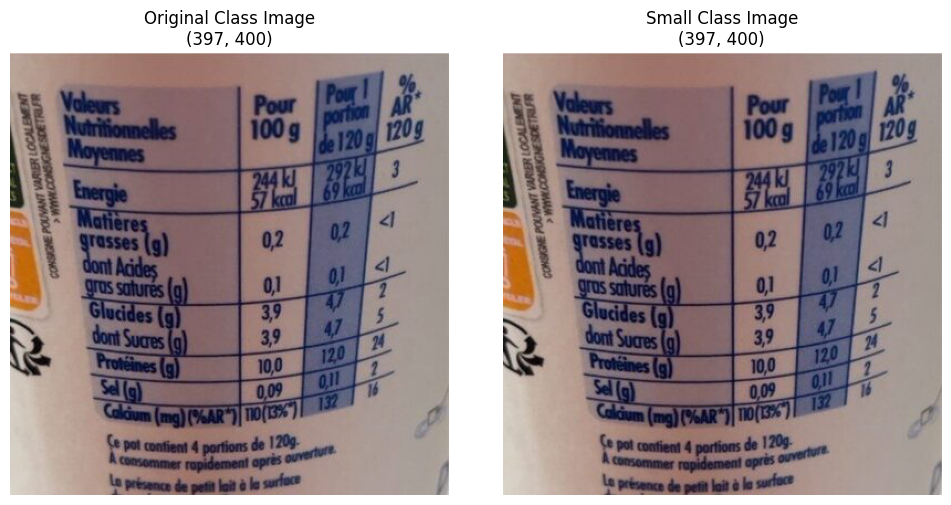

In [16]:
from PIL import Image
import pandas as pd
import requests
from io import BytesIO
import matplotlib.pyplot as plt

index = 3

image_url_original = df['image_nutrition_url'][index]
# print('URL: ', image_url)
response_original = requests.get(image_url_original, verify = False)
image_original = Image.open(BytesIO(response_original.content)).convert('RGB')
print('A')

image_url_small = df['image_nutrition_small_url'][index]
# print('URL: ', image_url)
response_small = requests.get(image_url_original, verify = False)
image_small = Image.open(BytesIO(response_original.content)).convert('RGB')

# Display the images using matplotlib
plt.figure(figsize=(10, 5))

# Display the original size image with larger dimensions
plt.subplot(1, 2, 1)
plt.imshow(image_original)
plt.title(f'Original Class Image\n{image_original.size}')
plt.axis('off')

# Display the small size image with its actual dimensions
plt.subplot(1, 2, 2)
plt.imshow(image_small)
plt.title(f'Small Class Image\n{image_small.size}')
plt.axis('off')

# Show the images
plt.tight_layout()
plt.show()

### Nutrition image available: filter

Then, we select the products that have a nutritional table's image available (url). class: ['image_nutrition_url']

In [42]:
# missing_images = df['image_nutrition_url'].notna().sum()

df_with_nutrition_images = df[df['image_nutrition_url'].notna()]


# print("Missing Nutrition Data:\n", missing_nutrition)
print("Total number of Items with Nutrition Image Data available:\n", len(df_with_nutrition_images))
print("Ratio items with Nutrition Image Data available vs total items in df:\n", len(df_with_nutrition_images)/len(df))

df_with_nutrition_images = df[df['image_nutrition_url'].notna()]

Total number of Items with Nutrition Image Data available:
 36470
Ratio items with Nutrition Image Data available vs total items in df:
 0.3647


### What columns should we choose?

Due to the fact that there are 119 nutrition columns available, we need to select the most useful ones to our task. Some of them, such as linoleic-acid_100g', 'arachidonic-acid_100g', 'gamma-linolenic-acid_100g', 'dihomo-gamma-linolenic-acid_100g' are rarely used in a nutritional table and are also empty in the dataset. Therefore, we should focus on the ones with more data. (not empty)

We will extract the columns with at least 75% of the data available (not NaN)

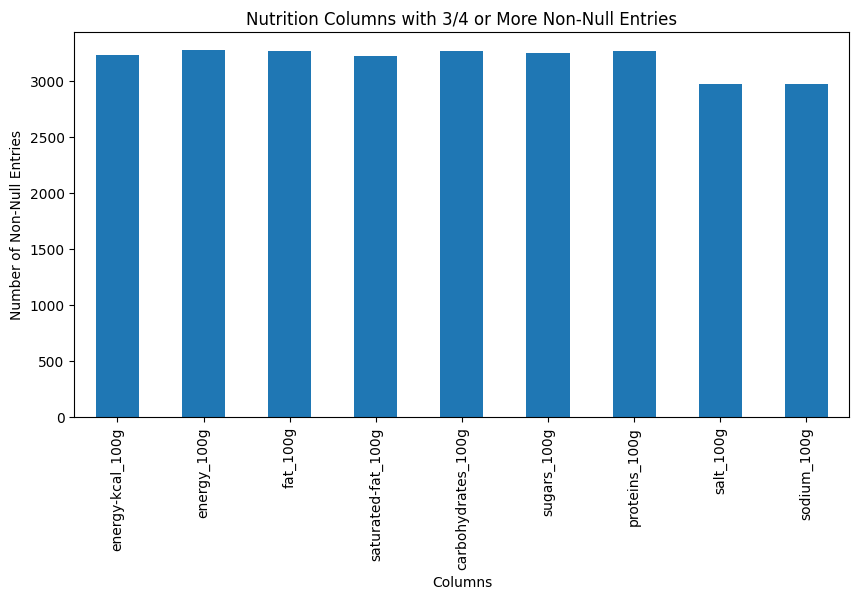

In [41]:
import matplotlib.pyplot as plt

nrows = df_with_nutrition_images.shape[0]

missing_nutrition = df_with_nutrition_images[nutrition_columns].notna().sum()
# Assuming 'missing_nutrition' and 'missing_images' are Pandas Series containing the non-null counts.
# Filter for columns with 1500 or more non-null entries
non_null_nutrition = missing_nutrition[missing_nutrition >= nrows - nrows/4] 

# Plot filtered nutrition data
non_null_nutrition.plot(kind='bar', figsize=(10, 5))
plt.title('Nutrition Columns with 3/4 or More Non-Null Entries')
plt.xlabel('Columns')
plt.ylabel('Number of Non-Null Entries')
plt.show()

At the same time, we can observe that the columns with more non-empty entries are the ones that frequently appear in a nutritional table:

URL:  https://images.openfoodfacts.org/images/products/000/000/000/004622327/nutrition_es.5.400.jpg


/Users/carlosdm/opt/anaconda3/envs/comp0197-cw1-pt/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'images.openfoodfacts.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


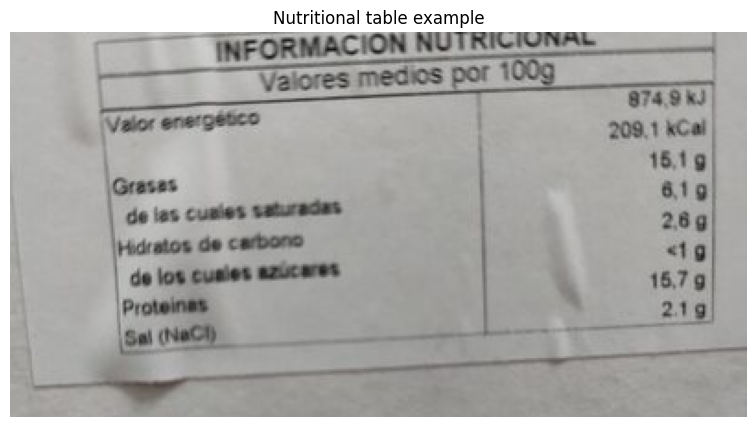

In [35]:
index = 8

image_url_original = df['image_nutrition_url'][index]
print('URL: ', image_url_original)
response_original = requests.get(image_url_original, verify = False)
image_original = Image.open(BytesIO(response_original.content)).convert('RGB')


# Display the images using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(image_original)
plt.title('Nutritional table example')
plt.axis('off')
plt.show()

However, we should select the columns' values that we want to extract from the image. We choose 'energy_100g' over 'energy-kcal_100g' because they express the same and there are more products with non-empty entries in the 'energy_100g' column. We select the rest of the columns shown in the graph.

In [48]:
selected_columns = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']

print("Total number of Items with Nutrition Image Data available:\n", len(df_with_nutrition_images))
df_filtered = df_with_nutrition_images.dropna(subset=selected_columns)
print('Length final dataset with Non-empty values: ', len(df_filtered))

Total number of Items with Nutrition Image Data available:
 36470
Length final dataset with Non-empty values:  30689


### URL cleaning

Since some of the links do not work, we need to clean up and only extract the links that are available in pre-processing step so that it is faster the image extraction when we are training the ML Model.

In [20]:
from PIL import Image
import pandas as pd
import requests
from io import BytesIO

def filter_valid_urls(df, timeout=15):
    valid_rows = []
    for idx, row in df.iterrows():
        image_url = row['image_nutrition_url']
        print(image_url)
        try:
            # Try downloading the image with a higher timeout
            response = requests.get(image_url, timeout=timeout)
            response.raise_for_status()  # Ensure the request was successful
            valid_rows.append(row)  # Add to the valid rows list if no exception
        except requests.exceptions.RequestException as e:
            print(f"Skipping URL due to error: {image_url}, Error: {e}")
    
    # Create a new dataframe with only valid rows
    return pd.DataFrame(valid_rows)

# Assuming df_filtered is your dataset
df_filtered_valid = filter_valid_urls(df_filtered, timeout=15)

https://images.openfoodfacts.org/images/products/000/000/000/00026772226/nutrition_fr.5.400.jpg
https://images.openfoodfacts.org/images/products/000/000/000/004622327/nutrition_es.5.400.jpg


https://images.openfoodfacts.org/images/products/000/000/000/006021/nutrition_en.5.400.jpg
https://images.openfoodfacts.org/images/products/000/000/000/080/nutrition_fr.11.400.jpg
https://images.openfoodfacts.org/images/products/000/000/000/112/nutrition_es.5.400.jpg
https://images.openfoodfacts.org/images/products/000/000/000/114/nutrition_fr.5.400.jpg
https://images.openfoodfacts.org/images/products/000/000/000/1199/nutrition_fr.14.400.jpg
https://images.openfoodfacts.org/images/products/000/000/000/129/nutrition_fr.5.400.jpg
https://images.openfoodfacts.org/images/products/000/000/000/186/nutrition_fr.5.400.jpg
https://images.openfoodfacts.org/images/products/000/000/000/188/nutrition_fr.5.400.jpg
https://images.openfoodfacts.org/images/products/000/000/000/1885/nutrition_fr.10.400.jpg
https://images.openfoodfacts.org/images/products/000/000/000/2264/nutrition_fr.7.400.jpg
https://images.openfoodfacts.org/images/products/000/000/000/3827/nutrition_fr.7.400.jpg
https://images.openfoo

## Useful statistics computation

In order to see how the data is distributed, we will compute some useful statistics such as mean, std, min and its quartiles. Additionally, we will plot the distribution of each category with a log scale to be able to see better how are they distributed in different bins.

### Brief statistics summary

In [45]:
# Get basic statistics for the non-null nutrition columns
print(df_filtered_valid[selected_columns].describe())

       energy_100g    fat_100g  saturated-fat_100g  carbohydrates_100g  \
count   139.000000  139.000000          139.000000          139.000000   
mean   1299.218705   17.499065            5.347109           31.010092   
std     895.814785   21.751032            7.746695           27.464065   
min       0.000000    0.000000            0.000000            0.000000   
25%     575.000000    1.750000            0.300000            8.080000   
50%    1188.000000    8.000000            2.600000           23.300000   
75%    1859.000000   24.800000            7.750000           53.000000   
max    3761.000000  100.000000           48.960000           96.500000   

       sugars_100g  proteins_100g   salt_100g  sodium_100g  
count   139.000000     139.000000  139.000000   139.000000  
mean     19.262934       6.904484    0.795308     0.318143  
std      24.367237       8.995451    0.998662     0.399474  
min       0.000000       0.000000    0.000000     0.000000  
25%       0.985000       1.3

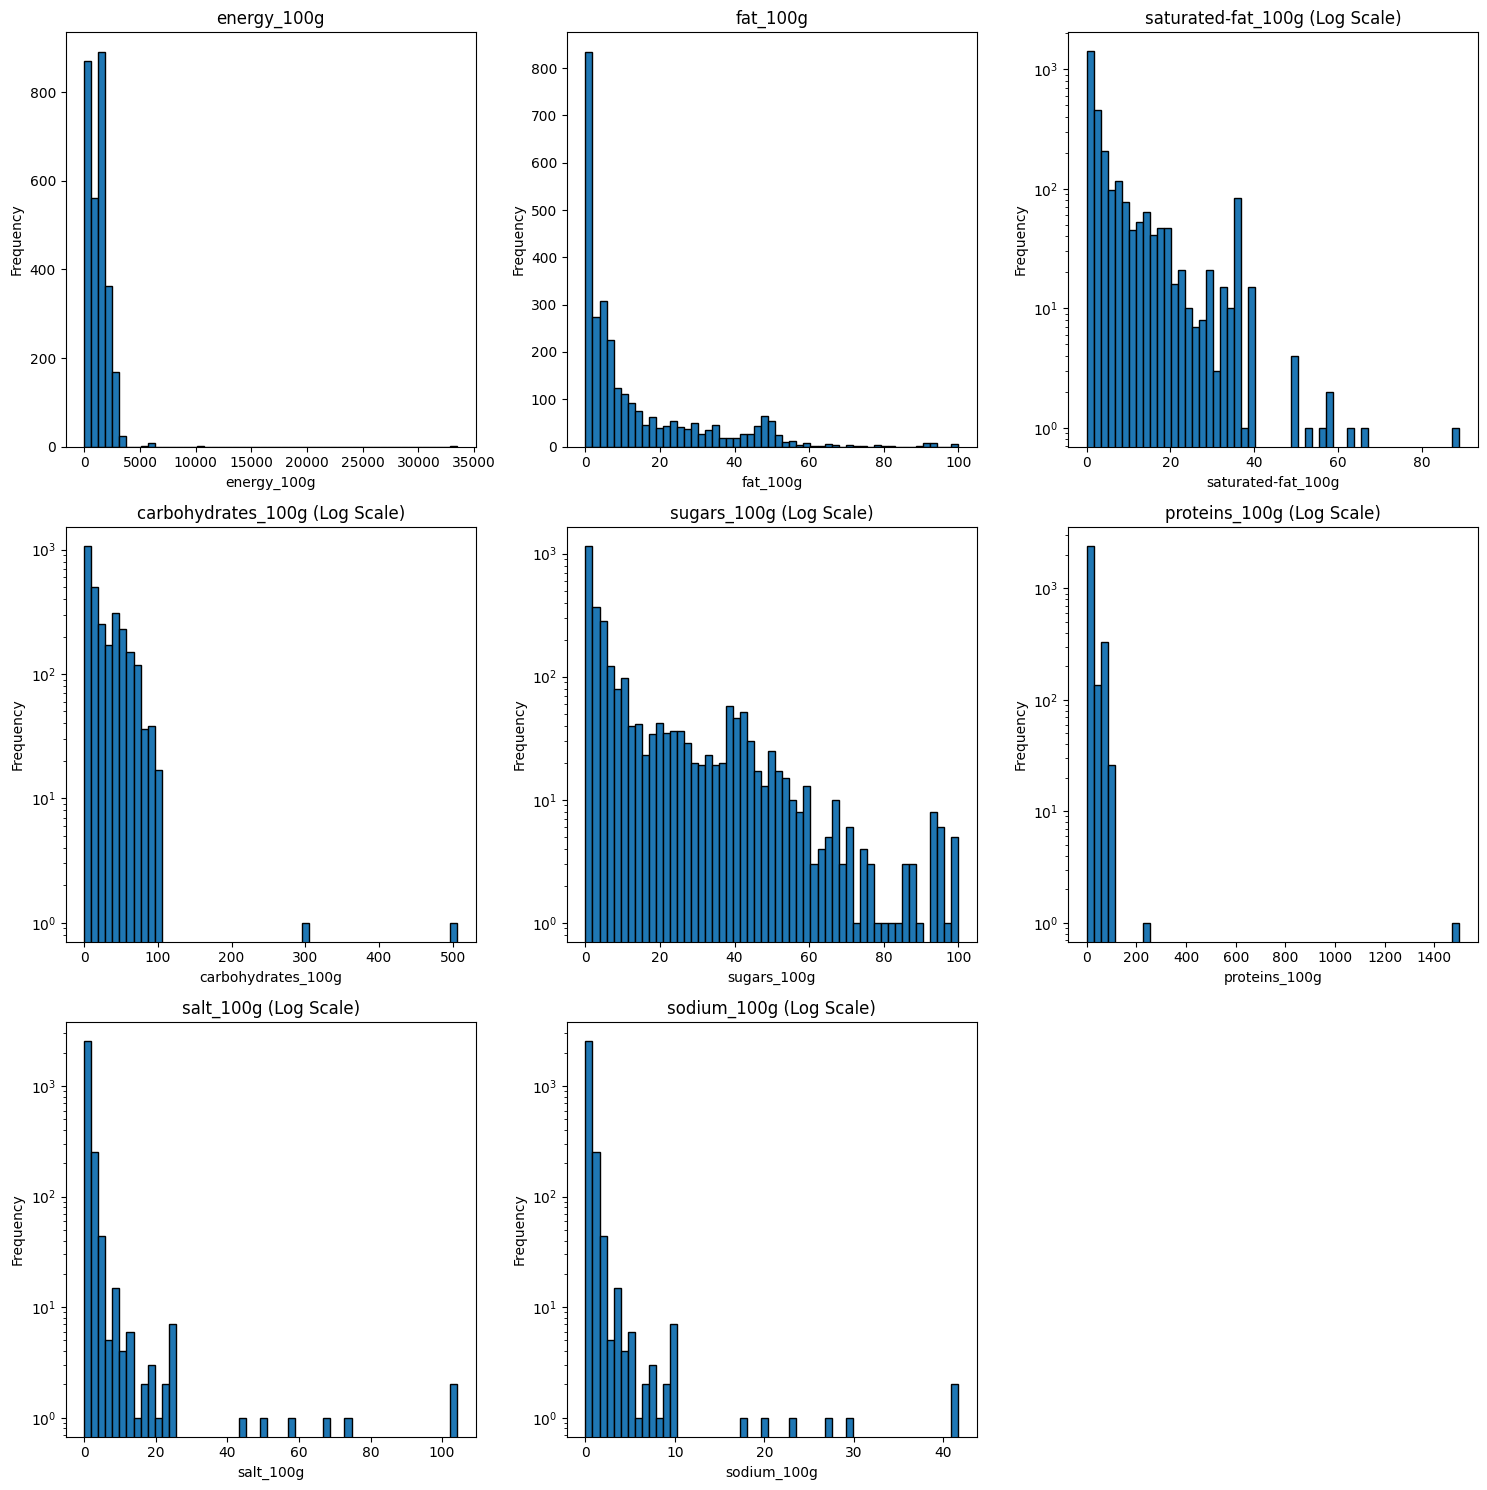

In [47]:
import numpy as np
import matplotlib.pyplot as plt

log_threshold = 1000

num_columns = len(selected_columns)
num_rows = (num_columns + 2) // 3 

plt.figure(figsize=(15, num_rows * 5))  

for i, col in enumerate(selected_columns, 1):
    # Drop NaNs
    data = df_filtered_valid[col].dropna()
    bins = int(np.sqrt(len(data)))
    counts, bin_edges = np.histogram(data, bins=bins)
    
    plt.subplot(num_rows, 3, i)
    
    
    if counts.max() > log_threshold:
        plt.hist(data, bins=bins, edgecolor='black', log=True)
        plt.title(f'{col} (Log Scale)')
    else:
        plt.hist(data, bins=bins, edgecolor='black')
        plt.title(f'{col}')
    
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout() 
plt.show()


All the plots show a significant number of outliers with very high values, which are highlighted well using the logarithmic scale. Additionally, most of the products in the dataset have relatively low values for the attributes. This log scale makes it easier to visualize and compare the products with extreme values, which might be more difficult to interpret on a linear scale due to the large range of values in the dataset.

### Boxplots

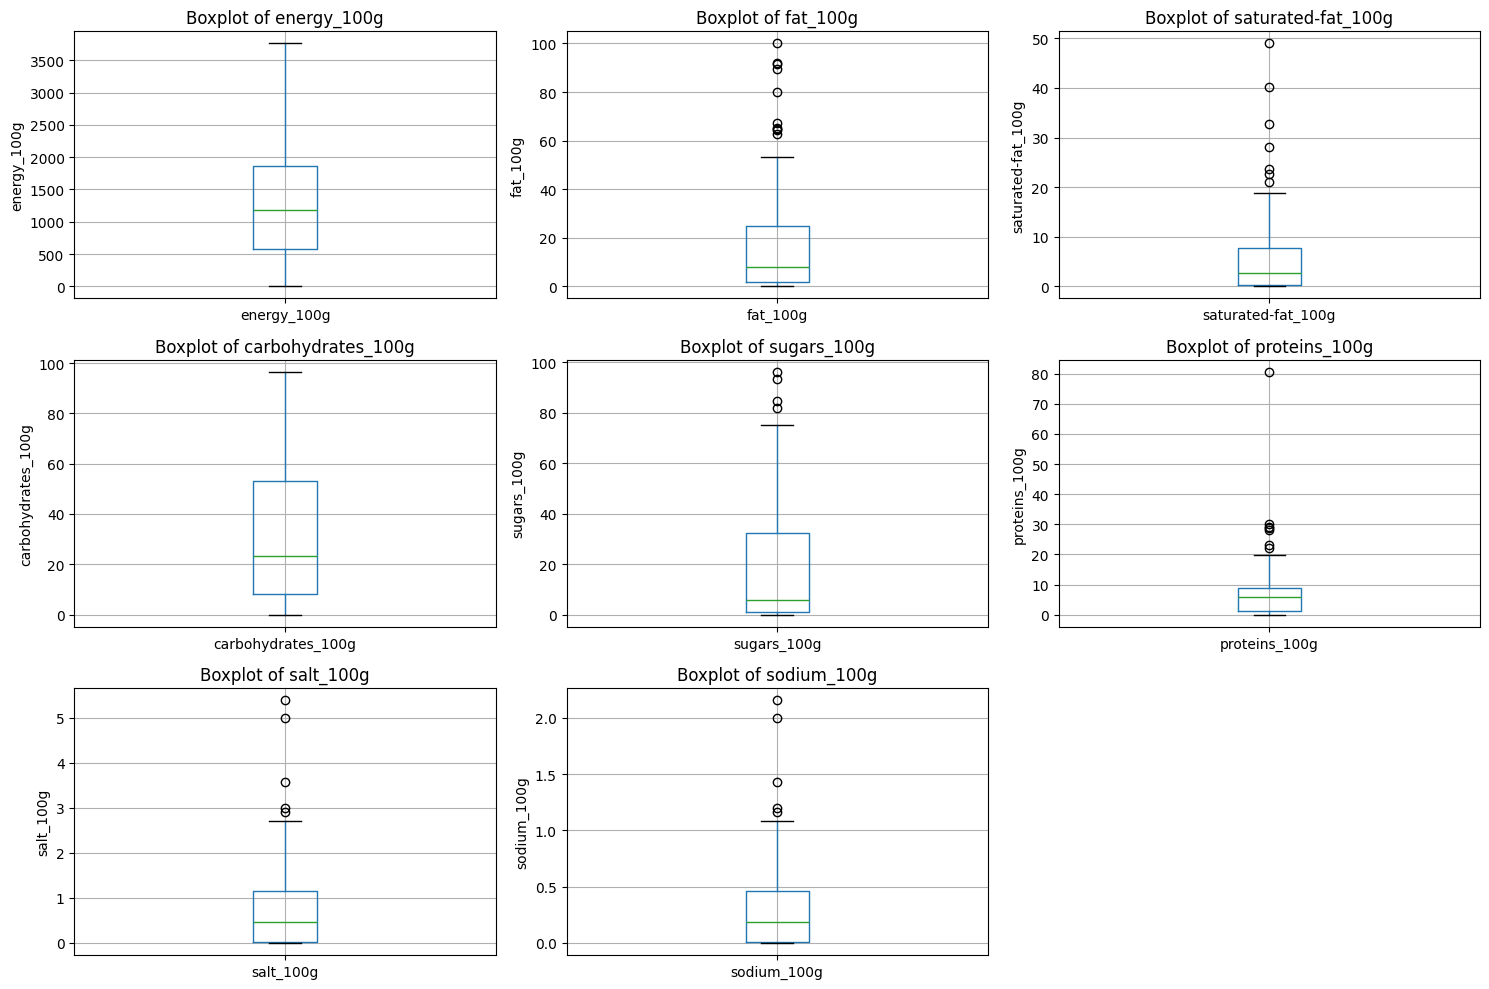

In [23]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 10))

for i, col in enumerate(selected_columns, 1):
    plt.subplot(3, 3, i)
    df_filtered_valid[[col]].boxplot()
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout() 
plt.show()


Across all boxplots, the majority of values are clustered at the lower end of each distribution, with tight Interquartile Ranges indicating that most products fall within a narrow range of values.
There are numerous outliers in all distributions, particularly for energy, fat, and carbohydrates, which suggest the presence of a few products with very extreme nutritional values.
The skewed nature of the data and the presence of outliers are consistent with the log-scaled histograms I showed earlier, meaning that most products have low to moderate nutritional values with a few high-value extremes.

## By product category study

By doing this, we can have an estimate of what the nutritional category value should be for each product category.

In [27]:
import pandas as pd

# Select the first 15 unique columns
top_15_columns = df_filtered_valid['main_category_en'].value_counts().index[:15]

# Filter the dataframe to only include these top 15 columns
df_top_15_columns = df_filtered_valid[df_filtered_valid['main_category_en'].isin(top_15_columns)]

# Group by the 'main_category_en' and calculate summary statistics for each category
grouped_data = df_top_15_columns.groupby('main_category_en')[selected_columns].agg(['mean', 'median', 'std'])

# Save the top 15 columns data to a CSV file to allow further research on it 
grouped_data.to_csv('top_15_columns_nutrition.csv', index=False)

grouped_data

energy_100g                       fat_100g         \
                             mean  median         std       mean median   
main_category_en                                                          
Beverages                    17.0    17.0         NaN   0.100000   0.10   
Bonbons                    2257.0  2257.0         NaN  33.300000  33.30   
Christmas Puddings         1284.0  1284.0    0.000000   7.000000   7.00   
Cream cheeses               238.0   238.0         NaN   0.200000   0.20   
Doughnuts                  1745.0  1745.0         NaN  24.000000  24.00   
Fondants                   1644.0  1644.0         NaN   4.800000   4.80   
Food colorings             3012.0  3012.0         NaN  80.000000  80.00   
Groceries                  1779.2  1887.0  813.397627  36.140000  38.80   
Medjool dates              1335.0  1335.0         NaN   0.000000   0.00   
Nuts                       1831.0  1831.0         NaN  19.700000  19.70   
Pastas                     1004.0  1004.0         NaN   1.600000   1.60   
Squeezed apple juices       242.5   242.5   30.405592   0.250000   0.25   
Sweetened beverages         190.0   180.0   19.974984   0.033333   0.00   
fr:decorations             1720.0  1720.0         NaN   6.420000   6.42   
it:Lardo di Colonnata      3397.0  3397.0         NaN  89.600000  89.60   

                                 saturated-fat_100g                   \
                             std               mean median       std   
main_category_en                                                       
Beverages                    NaN           0.100000   0.10       NaN   
Bonbons                      NaN          21.100000  21.10       NaN   
Christmas Puddings      0.000000           3.600000   3.60  0.000000   
Cream cheeses                NaN           0.100000   0.10       NaN   
Doughnuts                    NaN          10.000000  10.00       NaN   
Fondants                     NaN           3.300000   3.30       NaN   
Food colorings               NaN          48.960000  48.96       NaN   
Groceries              25.159650           5.440000   5.60  4.494775   
Medjool dates                NaN           0.000000   0.00       NaN   
Nuts                         NaN           1.700000   1.70       NaN   
Pastas                       NaN           0.300000   0.30       NaN   
Squeezed apple juices   0.353553           0.050000   0.05  0.070711   
Sweetened beverages     0.057735           0.000033   0.00  0.000058   
fr:decorations               NaN           3.530000   3.53       NaN   
it:Lardo di Colonnata        NaN          40.190000  40.19       NaN   

                      carbohydrates_100g  ... sugars_100g proteins_100g  \
                                    mean  ...         std          mean   
main_category_en                          ...                             
Beverages                           0.10  ...         NaN          0.10   
Bonbons                            53.80  ...         NaN          4.70   
Christmas Puddings                 54.20  ...    0.000000          3.90   
Cream cheeses                       3.90  ...         NaN         10.00   
Doughnuts                          44.00  ...         NaN          6.10   
Fondants                           87.10  ...         NaN          0.00   
Food colorings                      0.00  ...         NaN          0.00   
Groceries                          12.64  ...    7.289856          4.94   
Medjool dates                      73.00  ...         NaN          2.00   
Nuts                               55.20  ...         NaN          8.00   
Pastas                             47.00  ...         NaN          8.30   
Squeezed apple juices              14.25  ...    2.828427          0.35   
Sweetened beverages                11.70  ...    6.092892          0.00   
fr:decorations                     87.86  ...         NaN          0.03   
it:Lardo di Colonnata               0.36  ...         NaN          0.98   

                       

In [ ]:
# Loop through each row (which represents a category) and print the statistics
for category, row in grouped_data.iterrows():
    print(f"Category: {category}")
    
    # For each nutritional column, print the mean, median, and std
    for col in selected_columns:
        try:
            mean_val = row[(col, 'mean')]
            median_val = row[(col, 'median')]
            std_val = row[(col, 'std')]

            print(f"  {col}:")
            print(f"    Mean: {mean_val}")
            print(f"    Median: {median_val}")
            print(f"    Std: {std_val}")
        except KeyError:
            print(f"  {col} data is missing.")
    
    print()  # Separate each category by a new line for readability


Category: Biscuits
  energy_100g:
    Mean: 1827.7884615384614
    Median: 1943.0
    Std: 457.1053044793168
  fat_100g:
    Mean: 19.055703115264816
    Median: 19.352419354838503
    Std: 7.035821712651642
  saturated-fat_100g:
    Mean: 8.23166586027351
    Median: 7.8125
    Std: 5.56696187322802
  carbohydrates_100g:
    Mean: 62.89852436604191
    Median: 67.6944971537
    Std: 14.499555953549507
  sugars_100g:
    Mean: 27.22756046819172
    Median: 30.0
    Std: 12.146764594077938
  proteins_100g:
    Mean: 5.704460754667286
    Median: 5.31015037593985
    Std: 3.533395418774407
  salt_100g:
    Mean: 0.8454912892732559
    Median: 0.75657894736842
    Std: 0.6613397282974011
  sodium_100g:
    Mean: 0.33819507340161004
    Median: 0.302631578947368
    Std: 0.26453018632010306

Category: Breads
  energy_100g:
    Mean: 1105.0894308943089
    Median: 1101.0
    Std: 273.0184047158871
  fat_100g:
    Mean: 4.607774972529714
    Median: 3.5714285714286
    Std: 4.813459653493477